![USGS Logo](https://logowik.com/content/uploads/images/usgs2667.logowik.com.webp)

In [1]:
import os
import glob
#os.chdir('..')
os.chdir('USGSdata')

In [2]:
path_to_save_directory = os.getcwd()
path_to_save_directory

'/home/jovyan/USGSdata'

# Combine Precipitation Data

In [5]:
import glob 
import xarray as xr 
import numpy as np 
import pandas as pd 
from datetime import datetime

In [35]:
#Option 1: use all files up to 2024
files2024 = glob.glob('basin*')
files=files2024

In [36]:
#Option 2: use files only to 2021
files2021=files[0:44]
files=files2021

In [39]:
# Files used = 46 if using files to 2024
# Files used = 44 if using files to 2022
len(files)

43

In [40]:
# Define daily data 
daily_P={}

In [41]:
# Define a dictionary containing annuaprecip data
data = {'year': [],
        'prcp': []} 

In [42]:
#Set index to length of years
index = pd.RangeIndex(len(files))

In [85]:
index

RangeIndex(start=0, stop=43, step=1)

In [95]:
# Convert the dictionary into DataFrame
df = pd.DataFrame(data, columns=['year', 'prcp'])


## MAIN: Calculate total annual precipitation

In [96]:
# iterate through each row and select using simplest index method
# 'Year' and 'Prcp' column respectively.
for ind in index:
    current = pd.read_csv(files[ind])
    
    daily_P['date']=pd.to_datetime(current['day'])
    daily_P['prcp'] = round(current['prcp'], 2)
    df.loc[ind,'year'] =daily_P['date'].dt.year[0]
    df.loc[ind,'prcp'] = round(current['prcp'].sum(),2)
    
    #print(df['year'][ind], df['prcp'][ind])

In [97]:
# check file output for first few rows
df[0:4]

,year,prcp
0,1983.0,2067.45
1,2011.0,1223.88
2,1987.0,1705.34
3,2015.0,1741.15


In [98]:
# fix year column by converting to integer
df = df.astype({'year':'int'})

In [99]:
# check output for the first few rows
df[0:4]

,year,prcp
0,1983,2067.45
1,2011,1223.88
2,1987,1705.34
3,2015,1741.15


## Plot Precipitation 

Text(0, 0.5, 'Annual precipitation, mm')

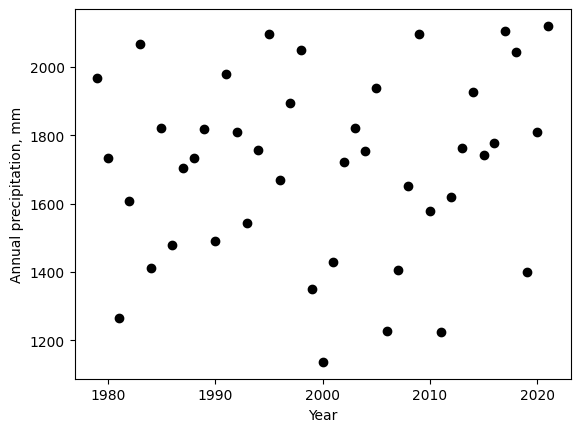

In [100]:
import matplotlib.pyplot as plt

#plt.plot(df.index, df['prcp'], 'o', color = 'black')
plt.plot(df['year'], df['prcp'], 'o', color = 'black')
plt.xlabel('Year')
plt.ylabel('Annual precipitation, mm')

Text(0, 0.5, 'Annual precipitation, mm')

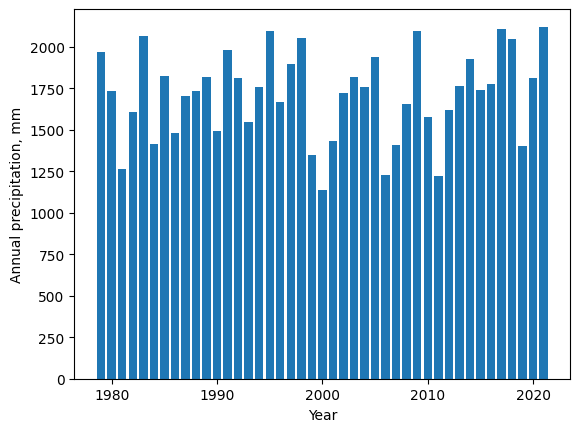

In [105]:
plt.bar(df['year'], df['prcp'])
plt.xlabel('Year')
plt.ylabel('Annual precipitation, mm')

## Check software requirements used in this Notebook
### not needed if running in Binder

In [106]:
#!pip freeze | findstr matplotlib
#!pip freeze | findstr numpy
#!pip freeze | findstr pandas

## Land Acknowledgement

The University of Washington acknowledges the Coast Salish peoples of this land, the land which touches the shared waters of all tribes and bands within the Suquamish, Tulalip and Muckleshoot nations.
